In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

from scipy.stats import norm

df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [2]:
def check_columns(df1, df2):
    df1_columns = set(df1.columns)
    df2_columns = set(df2.columns)
    print('Diff in columns df1: ', df1_columns - df2_columns)
    print('Diff in columns df2: ', df2_columns - df1_columns)

In [3]:
check_columns(df_train, df_test)

Diff in columns df1:  {'SalePrice'}
Diff in columns df2:  set()


In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

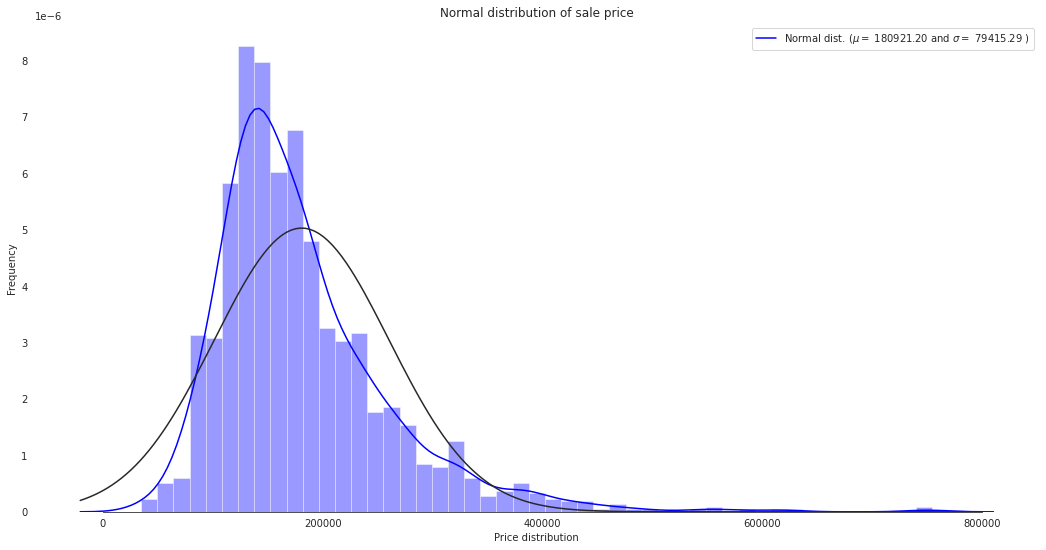

In [5]:
sns.set_style('white')
sns.set_color_codes(palette = 'pastel')

f, ax = plt.subplots(figsize = (18,9))

sns.distplot(a = df_train['SalePrice'], fit = norm, color = 'blue')

mu, sigma = norm.fit(df_train['SalePrice'])

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
ax.set(xlabel = 'Price distribution')
ax.set(ylabel = 'Frequency')
ax.set(title = 'Normal distribution of sale price')

sns.despine(left = True, trim = True)

plt.show()

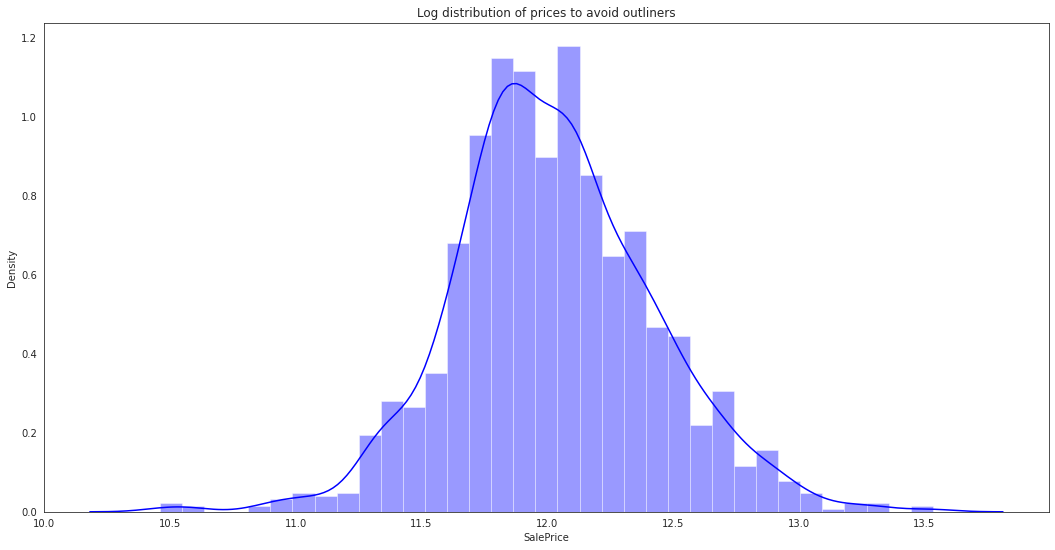

In [6]:
plt.figure(figsize=(18,9))
sns.distplot(np.log(df_train['SalePrice']), color = 'blue')
plt.title('Log distribution of prices to avoid outliners')
plt.show()

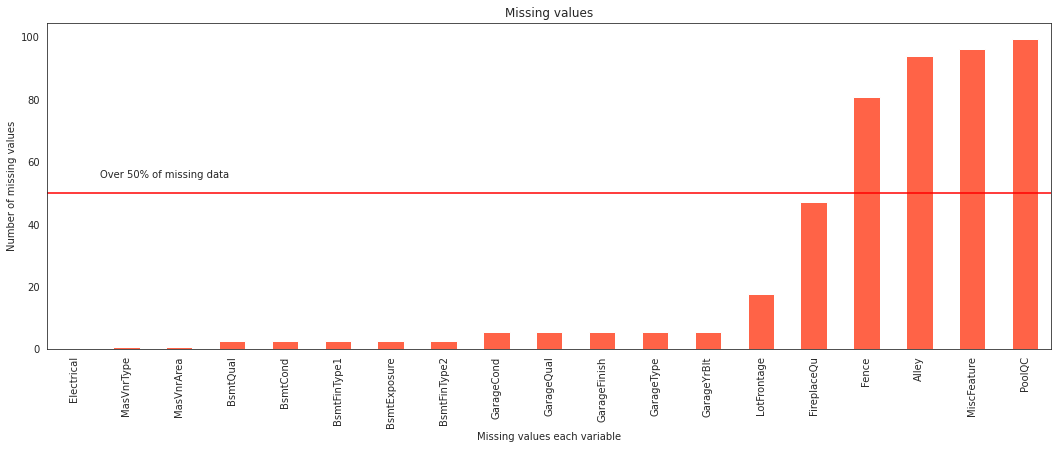

In [7]:
f, ax = plt.subplots(figsize = (18, 6))

missing = round(df_train.isnull().mean() * 100, 2)
missing = missing[missing >= 0.05]
missing.sort_values(inplace = True)

missing.plot.bar(color = 'tomato')

plt.hlines(50, -50, +50 ,colors = 'red', linestyle = '-')
plt.text(0.5, 55, 'Over 50% of missing data')

ax.set(xlabel = 'Missing values each variable')
ax.set(ylabel = 'Number of missing values')
ax.set(title = 'Missing values')

plt.show()

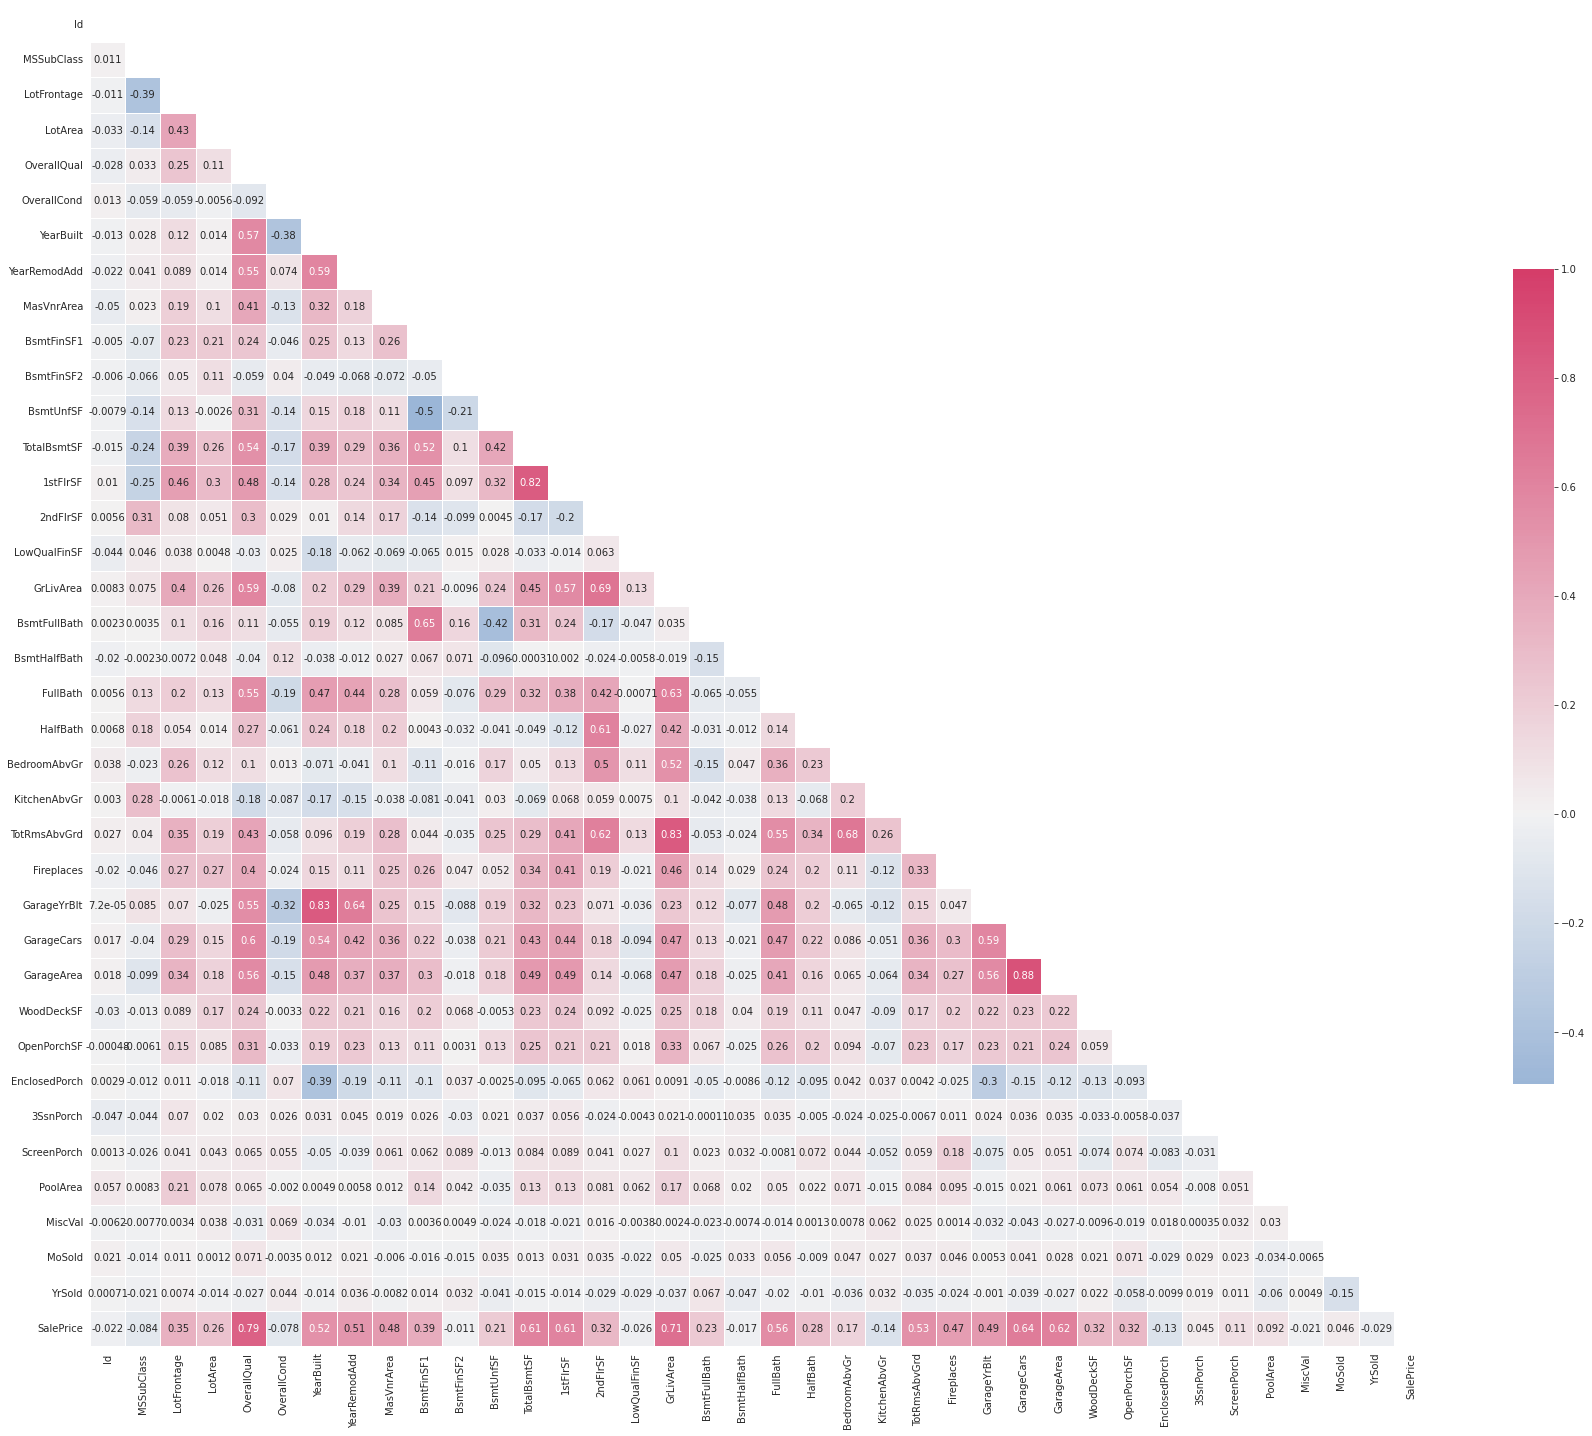

In [8]:
f, ax = plt.subplots(figsize = (30, 30))

corr_matrix = df_train.corr('pearson')
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
cmap = sns.diverging_palette(250, 0, as_cmap = True)

sns.heatmap(corr_matrix, mask = mask, cmap = cmap, vmax = 1, center = 0, annot = True,
           square = True, linewidths = .5, cbar_kws = {'shrink': .5})

plt.show()

In [9]:
def plot_correlation(dataframe, target_column, feature_column):
    f, ax = plt.subplots(1, 3, figsize = (18, 6))
    sns.boxplot(data = dataframe, x = feature_column, y = target_column, ax = ax[0], palette = 'pastel')
    sns.violinplot(data = dataframe, x = feature_column, y = target_column, ax = ax[1], palette = 'pastel')
    sns.stripplot(data = dataframe, x = feature_column, y = target_column, ax = ax[2], palette = 'pastel')
    
    plt.show()

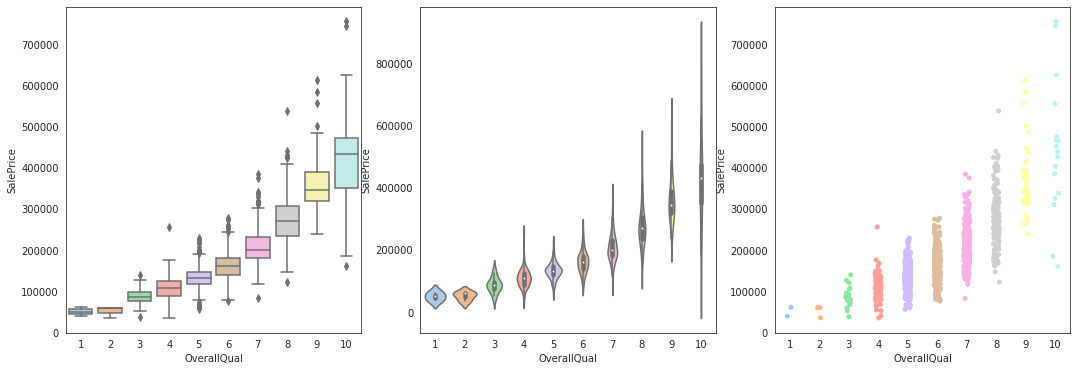

In [10]:
plot_correlation(df_train, 'SalePrice', 'OverallQual')

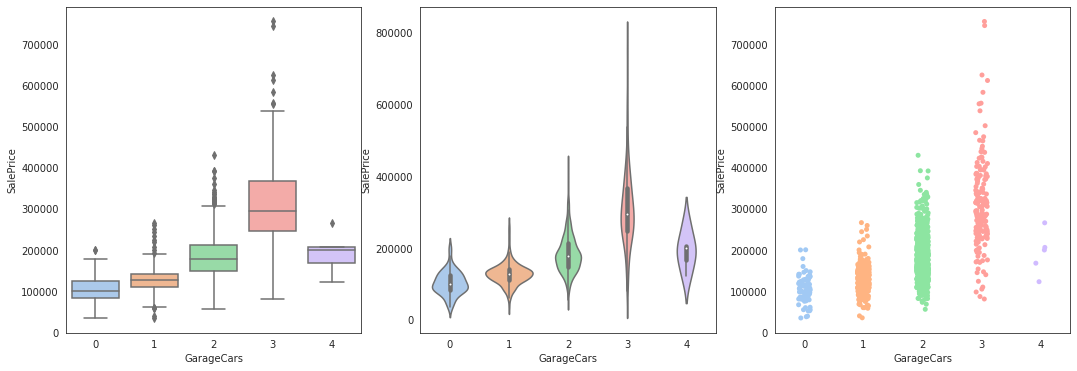

In [11]:
plot_correlation(df_train, 'SalePrice', 'GarageCars')

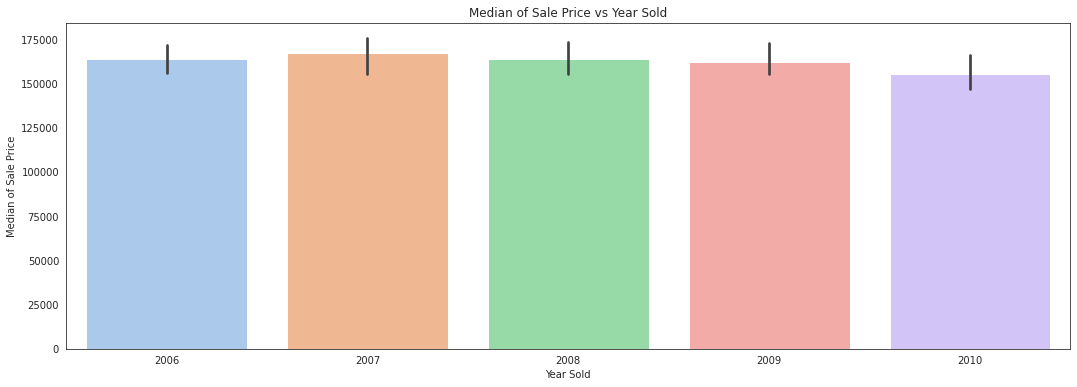

In [12]:
f, ax = plt.subplots(figsize = (18, 6))

sns.barplot(x = 'YrSold', y = 'SalePrice', data = df_train, estimator = np.median, palette = 'pastel')
ax.set(xlabel = 'Year Sold')
ax.set(ylabel = 'Median of Sale Price')
ax.set(title = 'Median of Sale Price vs Year Sold')

plt.show()

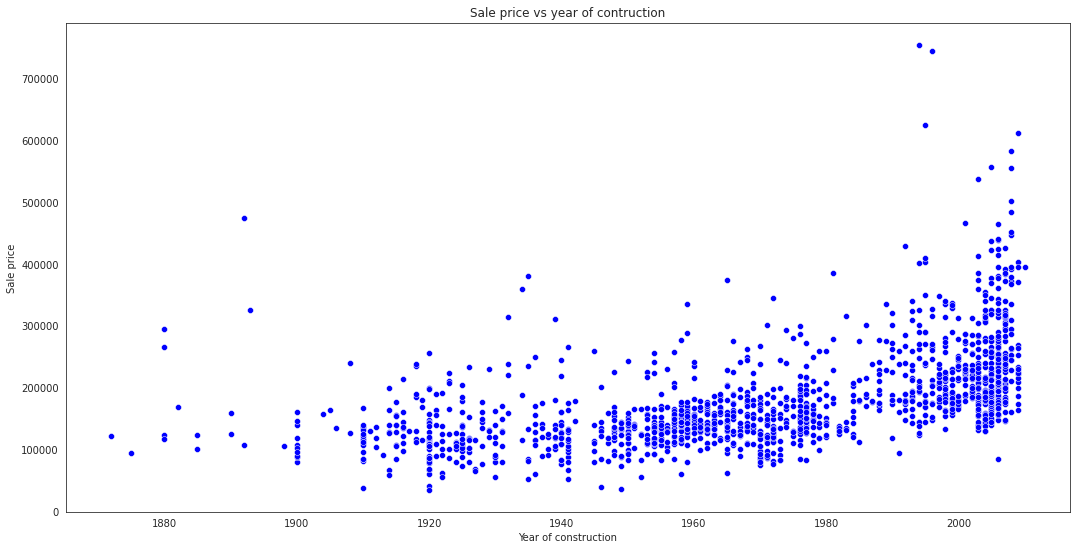

In [13]:
f, ax = plt.subplots(figsize = (18, 9))

sns.scatterplot(x = 'YearBuilt', y = 'SalePrice', data = df_train, color = 'blue')
ax.set(xlabel = 'Year of construction')
ax.set(ylabel = 'Sale price')
ax.set(title = 'Sale price vs year of contruction')

plt.show()

In [14]:
df_relevant = corr_matrix[corr_matrix['SalePrice'] > 0.50]
df_relevant_list = df_relevant.index.values
df_non_relevant = corr_matrix[corr_matrix['SalePrice'] < 0.50]
df_non_relevant_list = df_non_relevant.index.values

df_train2 = df_train.drop(df_non_relevant_list, axis = 1)

df_test2 = df_test.drop(df_non_relevant_list, axis = 1)
df_train2

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageArea,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,548,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,460,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,608,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,642,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,836,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,460,TA,TA,Y,NaN,NaN,NaN,WD,Normal,175000
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,500,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,210000
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,252,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal,266500
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,240,TA,TA,Y,NaN,NaN,NaN,WD,Normal,142125


In [15]:
features_in_test = df_test2.columns.values
df_train2 = df_train[features_in_test]
df_train2['SalePrice'] = df_train['SalePrice']

In [16]:
df_total_na = pd.DataFrame(df_train.isna().mean(), columns = ['% missing data'])
df_total_na['Useful'] = np.where(df_total_na['% missing data'] >= 0.50, 'No', 'Yes')

df_na_to_fill = df_total_na[df_total_na['% missing data'] != 0]
df_na_to_fill

,% missing data,Useful
LotFrontage,0.177397,Yes
Alley,0.937671,No
MasVnrType,0.005479,Yes
MasVnrArea,0.005479,Yes
BsmtQual,0.025342,Yes
BsmtCond,0.025342,Yes
BsmtExposure,0.026027,Yes
BsmtFinType1,0.025342,Yes
BsmtFinType2,0.026027,Yes
Electrical,0.000685,Yes


In [17]:
# Hot Encoding categorical variables
he_df_train2 = pd.get_dummies(df_train2)
df_train2 = he_df_train2.select_dtypes(exclude = ['object'])

same_columns = list(df_test2.columns.values)
df_train2 = df_train2[df_train2.columns.intersection(same_columns)]

df_train2

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,7,2003,2003,856,856,1710,2,8,2,548
1,6,1976,1976,1262,1262,1262,2,6,2,460
2,7,2001,2002,920,920,1786,2,6,2,608
3,7,1915,1970,756,961,1717,1,7,3,642
4,8,2000,2000,1145,1145,2198,2,9,3,836
...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460
1456,6,1978,1988,1542,2073,2073,2,7,2,500
1457,7,1941,2006,1152,1188,2340,2,9,1,252
1458,5,1950,1996,1078,1078,1078,1,5,1,240


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [19]:
# Split de train set
X = df_train2
y = df_train['SalePrice']

X_train, X_test, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [20]:
# Train some RF models
def generate_models(n_iterations_begin, n_iterations_end, step, X_train, y_train, X_test, y_val):
    best_estimator, best_mae = 0, 0
    
    for i in range(n_iterations_begin, n_iterations_end, step):
        model = RandomForestRegressor(n_estimators = i, criterion = 'absolute_error', random_state = 42)
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        
        mae = mean_absolute_error(y_val, prediction)
        if (best_mae == 0):
            best_mae = mae
        elif (mae < best_mae):
            best_mae = mae
            best_estimator = i
    
    return best_estimator, best_mae

In [21]:
estimator, best_mae = generate_models(250, 260, 5, X_train, y_train, X_test, y_val)

print(estimator)
print(best_mae)

0
18411.286643835614


In [22]:
# Best estimator is 255
model = RandomForestRegressor(n_estimators = 255, random_state = 42, criterion = 'absolute_error')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

# Change prediction to dataframe and suit format

In [23]:
# Calculate accuracy
accuracy = pd.DataFrame(y_val)
accuracy = accuracy.reset_index(drop = True)
accuracy['SalePrice_prediction'] = pd.DataFrame(prediction)

accuracy

,SalePrice,SalePrice_prediction
0,154500,143634.411765
1,325000,317424.694118
2,115000,114494.215686
3,159000,168876.549020
4,315500,317733.784314
...,...,...
287,89471,128288.529412
288,260000,221507.568627
289,189000,180755.254902
290,108000,129412.341176


In [24]:
# Format the dataframe
accuracy['SalePrice_prediction'] = round(accuracy['SalePrice_prediction'], 0)
accuracy['SalePrice_prediction'] = accuracy['SalePrice_prediction'].astype('int')

accuracy['Diff'] = np.abs(accuracy['SalePrice'] - accuracy['SalePrice_prediction'])
accuracy['Diff %'] = (accuracy['Diff'] / accuracy['SalePrice']) * 100

print('Mean accuracy of the model: ', round(100 - accuracy['Diff %'].mean(), 2), '%')
print('Average ammount of $ difference: ', round(accuracy['Diff'].mean(), 2), '$')

accuracy

Mean accuracy of the model:  88.35 %
Average ammount of $ difference:  18426.38 $


,SalePrice,SalePrice_prediction,Diff,Diff %
0,154500,143634,10866,7.033010
1,325000,317425,7575,2.330769
2,115000,114494,506,0.440000
3,159000,168877,9877,6.211950
4,315500,317734,2234,0.708082
...,...,...,...,...
287,89471,128289,38818,43.386125
288,260000,221508,38492,14.804615
289,189000,180755,8245,4.362434
290,108000,129412,21412,19.825926


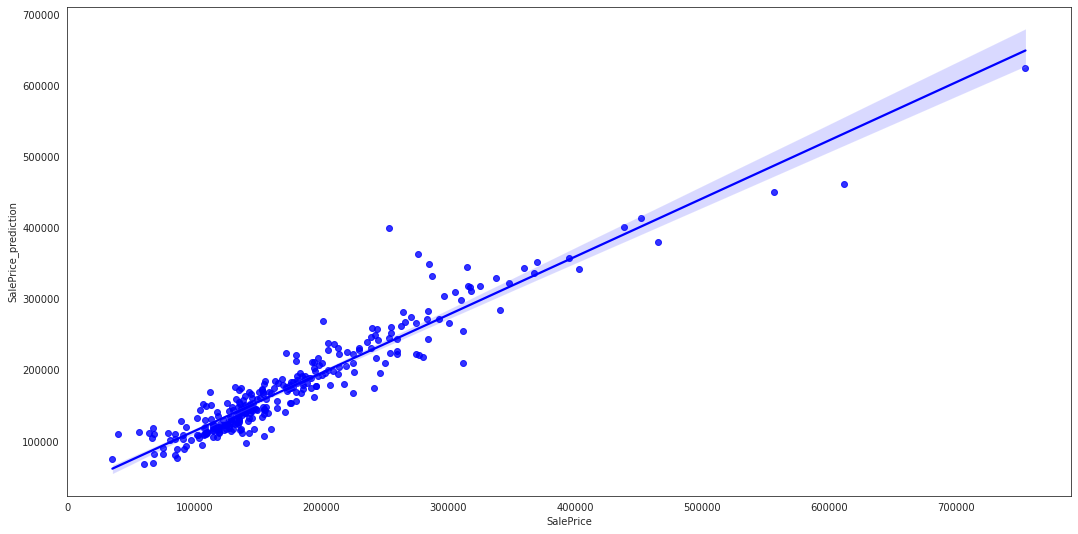

In [25]:
f, ax = plt.subplots(figsize = (18, 9))

sns.regplot(data = accuracy, x = 'SalePrice', y = 'SalePrice_prediction', color = 'blue')

plt.show()

In [26]:
# Prediction for the contest
df_test2 = pd.get_dummies(df_test2)
df_test2 = df_test2.select_dtypes(exclude = ['object'])

shared_columns = df_test2.columns.intersection(df_train2.columns)
shared_columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'],
      dtype='object')

In [27]:
df_test2 = df_test2[shared_columns]
df_test2

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,5,1961,1961,882.0,896,896,1,5,1.0,730.0
1,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0
2,5,1997,1998,928.0,928,1629,2,6,2.0,482.0
3,6,1998,1998,926.0,926,1604,2,7,2.0,470.0
4,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0
...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,546.0,546,1092,1,5,0.0,0.0
1455,4,1970,1970,546.0,546,1092,1,6,1.0,286.0
1456,5,1960,1996,1224.0,1224,1224,1,7,2.0,576.0
1457,5,1992,1992,912.0,970,970,1,6,0.0,0.0


In [28]:
df_test2 = df_test2.fillna(0)

In [29]:
# Result for submission
final_result = model.predict(df_test2)
final_result = pd.DataFrame(final_result)

In [30]:
# Formatting the dataframe
final_result = round(final_result, 0)
def round_price(x, base = 25):
    return base * round(x / base)

final_result = final_result.apply(lambda x: round_price(x))
final_result = final_result.astype({0: 'int'})
final_result

,0
0,120450
1,144500
2,173025
3,190925
4,219875
...,...
1454,86325
1455,89825
1456,143100
1457,117750


In [31]:
final_result = final_result.reset_index()
final_result = final_result.rename({0: 'Id', 1: 'SalePrice'}, axis = 1)
final_result['SalePrice'] = final_result['Id']
final_result = final_result.drop(columns = ['index'])

final_result
final_result.to_csv('submission.csv', index = False)